# Recurrent neural network
- A recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes form a directed graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior. Derived from feedforward neural networks, RNNs can use their internal state (memory) to process variable-length sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition, or speech recognition.

### Long short-term memory
- Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points but also entire sequences of data.
    - For example, LSTM is applicable to tasks such as handwriting recognition, speech recognition and anomaly detection in network traffic.
    - A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.
    - LSTMs were developed to deal with the vanishing gradient problem that can be encountered when training traditional RNNs.

- load dataset

In [1]:
# import library
import numpy as np # linear algebra
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

import statistics 
from statistics import mode 

# load data
data = pd.read_csv("../../data.csv")
# Get valuse from data (datafram)
data = data.values
X = data[:,0:6] # all rows, no Lebal
y = data[:,6] # all rows, label only

# Define PolynomialFeatures variable with degree 5 and without bias
poly = PolynomialFeatures(degree=2 , include_bias=False)
X=poly.fit_transform(X)
X.shape

(11077, 27)

#### Reformat dataset
- Reformat dataset to create windows with size 60 to create time sequence
- That is because of the output of the current record does not depend on the current input only but also the previous sequence (time sequence)

In [2]:
def createWindows(X,y):
    features_set = []
    lebals = []
    W_SIZE = 60
    LENGTH = len(X)

    for i in range(W_SIZE,LENGTH):
        try:
            List = list(y[i-W_SIZE:i])
            val = mode(List)

            xx = X[i-W_SIZE:i,:]
            xx = np.array(xx)

            features_set.append(xx)
            lebals.append(val)
        except:
            print("error in i = ",i)
    return np.array(features_set) , np.array(lebals) 

In [3]:
# Reformat dataset
X,y = createWindows(X,y)

error in i =  259
error in i =  463
error in i =  641
error in i =  794
error in i =  1207
error in i =  1411
error in i =  1590
error in i =  1743
error in i =  1936
error in i =  2267
error in i =  2445
error in i =  3011
error in i =  3685
error in i =  4887
error in i =  5040
error in i =  5244
error in i =  5758
error in i =  6140
error in i =  6578
error in i =  6705
error in i =  7226
error in i =  7333
error in i =  7796
error in i =  7878
error in i =  8239
error in i =  8479
error in i =  8682
error in i =  8789
error in i =  8992
error in i =  9782
error in i =  10781


- split dataset to train and test dataset
    - with ratio 75% to train the dataset and 20% to the test dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('X_train sahse = ',X_train.shape)
print('X_test sahse = ',X_test.shape)
print('y_train sahse = ',y_train.shape)
print('y_test sahse = ',y_test.shape)

X_train sahse =  (8788, 60, 27)
X_test sahse =  (2198, 60, 27)
y_train sahse =  (8788,)
y_test sahse =  (2198,)


#### RNN (LSTM) Model
- create the LSTM model
- compile the LSTM model
- print the LSTM model summary
- train(Fit) the LSTM model
- Predict the output of X_test using LSTM Model

- We have trained a model using Simple RNN and it got accuracy 70% and then it fell in vanishing gradient problem

In [5]:
 ##############################################
# model.add(layers.SimpleRNN(units= 32 , input_shape=(60,27),activation='relu'))
# model.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid))
# model.add(tf.keras.layers.Dense(64, activation=tf.nn.sigmoid))
# model.add(tf.keras.layers.Dense(16, activation=tf.nn.sigmoid))
# model.add(Dense(7, activation='softmax'))
# model.compile(
#     loss=keras.losses.SparseCategoricalCrossentropy(),
#     optimizer="adam",
#     metrics=["accuracy"],
# )
#########################################

##### create the LSTM model
- LSTM layer
    - the dimensionality of the output space (units)
    - return_sequences (Whether to return the last output in the output sequence or the full sequence).
- Dropout
    - The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.

- Layers
    - LSTM with (unit = 50 ,return_sequences=True,input_shape =(60,27) )
    - Dropout with rate = 0.2
    
    - LSTM with (unit = 50 ,return_sequences=True)
    - Dropout with rate = 0.2
    
    - LSTM with (unit = 50 ,return_sequences=True)
    - Dropout with rate = 0.2
    
    - LSTM with (unit = 50)
    - Dropout with rate = 0.2
    
    - fully-connected layer (dense) with 128 nodes and sigmoid activation function
    - fully-connected layer (dense) with 7 nodes and softmax activation function

In [6]:
model = Sequential()

model.add(layers.LSTM(units = 50,
                     return_sequences=True ,
                     input_shape =(60,27)))
model.add(layers.Dropout(0.2))

model.add(layers.LSTM(units = 50,
                     return_sequences=True))
model.add(layers.Dropout(0.2))

model.add(layers.LSTM(units = 50,
                     return_sequences=True))
model.add(layers.Dropout(0.2))

model.add(layers.LSTM(units = 50))
model.add(layers.Dropout(0.2))

model.add(Dense(128, activation='sigmoid'))
model.add(Dense(7, activation='softmax'))

##### compile the LSTM model
- optimizer = adam
- sparse_categorical_crossentropy loss function 

In [7]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer="adam",
    metrics=["accuracy"],
)

##### print the LSTM model summary

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            15600     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

##### train(Fit) the LSTM model (epoch = 15)

In [9]:
hist = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=12
)

Epoch 1/12
275/275 [==============================] - 34s 124ms/step - loss: 1.0816 - accuracy: 0.5346 - val_loss: 0.6420 - val_accuracy: 0.7061
Epoch 2/12
275/275 [==============================] - 33s 121ms/step - loss: 0.5101 - accuracy: 0.7824 - val_loss: 0.3477 - val_accuracy: 0.8658
Epoch 3/12
275/275 [==============================] - 31s 112ms/step - loss: 0.3503 - accuracy: 0.8737 - val_loss: 0.1563 - val_accuracy: 0.9550
Epoch 4/12
275/275 [==============================] - 31s 113ms/step - loss: 0.1995 - accuracy: 0.9322 - val_loss: 0.1479 - val_accuracy: 0.9568
Epoch 5/12
275/275 [==============================] - 31s 113ms/step - loss: 0.1493 - accuracy: 0.9508 - val_loss: 0.0826 - val_accuracy: 0.9722
Epoch 6/12
275/275 [==============================] - 32s 117ms/step - loss: 0.1335 - accuracy: 0.9572 - val_loss: 0.0792 - val_accuracy: 0.9754
Epoch 7/12
275/275 [==============================] - 32s 115ms/step - loss: 0.0856 - accuracy: 0.9745 - val_loss: 0.0301 - val_ac

##### Predict the output of X_test using LSTM Model

In [10]:
y_predict=model.predict_classes(X_test)
y_predict[0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


3

#### Evaluate Model 
- calculate the evaluate model accuracy and loss (accuracy = 0.9923 , loss = 0.0283 ) 
- plot the training loss matrix
- plot the training accuracy matrix
- classification report 

In [11]:
# calculate the evaluate model accuracy and loss 
# (accuracy = 0.9959 , loss = 0.0143 )
val_loss, val_acc = model.evaluate(X_test, y_test)

69/69 [==============================] - 2s 30ms/step - loss: 0.0283 - accuracy: 0.9923


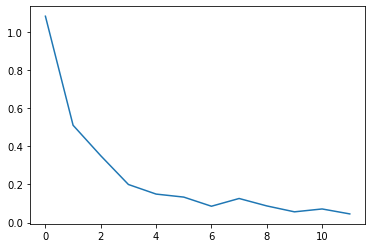

In [12]:
# plot the training loss matrix
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])

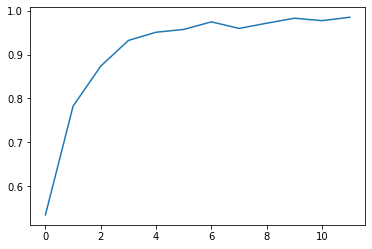

In [13]:
# plot the training accuracy matrix
plt.plot(hist.history['accuracy'])

In [14]:
# classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99       367
         2.0       1.00      0.98      0.99       379
         3.0       1.00      0.98      0.99       491
         4.0       0.95      0.99      0.97       175
         5.0       1.00      1.00      1.00       317
         6.0       1.00      1.00      1.00       469

    accuracy                           0.99      2198
   macro avg       0.99      0.99      0.99      2198
weighted avg       0.99      0.99      0.99      2198



#### save the model after training.
- so we can load it and run without the need to train anymore

In [15]:
keras.models.save_model(model,'RNN.h5')

#### load the model and predict the result

In [16]:
#load_model = keras.models.load_model('saved_model')
load_model = keras.models.load_model('RNN.h5')
load_y_predict=load_model.predict_classes(X_test)
load_y_predict[0]

3

- Evaluate the loaded model with classification_report

In [17]:
print(classification_report(y_test, load_y_predict))

              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99       367
         2.0       1.00      0.98      0.99       379
         3.0       1.00      0.98      0.99       491
         4.0       0.95      0.99      0.97       175
         5.0       1.00      1.00      1.00       317
         6.0       1.00      1.00      1.00       469

    accuracy                           0.99      2198
   macro avg       0.99      0.99      0.99      2198
weighted avg       0.99      0.99      0.99      2198

